In [113]:
#IMPORTS
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
import string


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
#LAST 10 YEAR STOCK PRICE
start = datetime.datetime(2013,3,28) 
end = datetime.datetime(2023, 3 ,28)
GME = yf.Ticker("GME") 
df_gme = GME.history(start=start, end=end)
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063773,4.459723,4.940137,39372800,0.0,0.0
2013-04-01 00:00:00-04:00,4.945435,5.311044,4.933071,5.256291,28086000,0.0,0.0
2013-04-02 00:00:00-04:00,5.252758,5.358732,5.132655,5.341070,16349200,0.0,0.0
2013-04-03 00:00:00-04:00,5.346368,5.406420,5.298680,5.342835,18020400,0.0,0.0
2013-04-04 00:00:00-04:00,5.335772,5.492966,5.208604,5.279253,17995200,0.0,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0


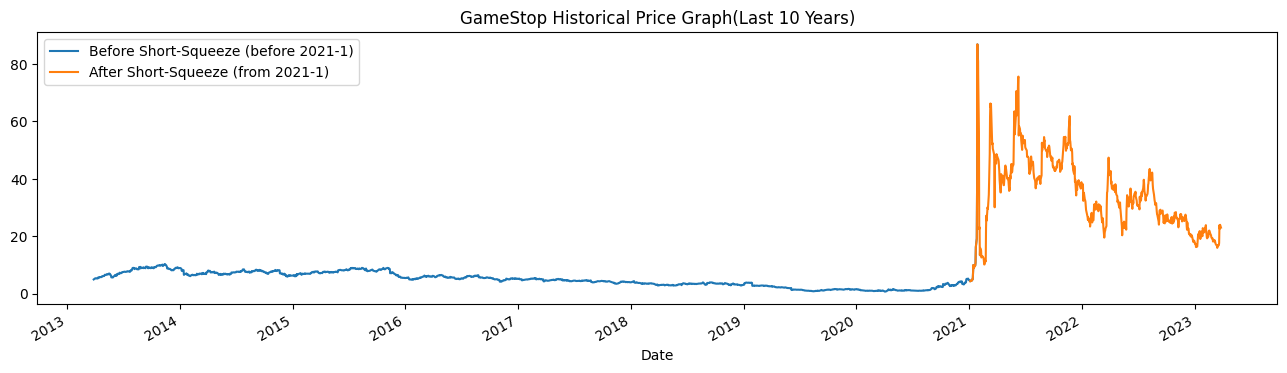

In [3]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)
plt.legend(["Before Short-Squeeze (before 2021-1)", "After Short-Squeeze (from 2021-1)"])
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()
plt.close()

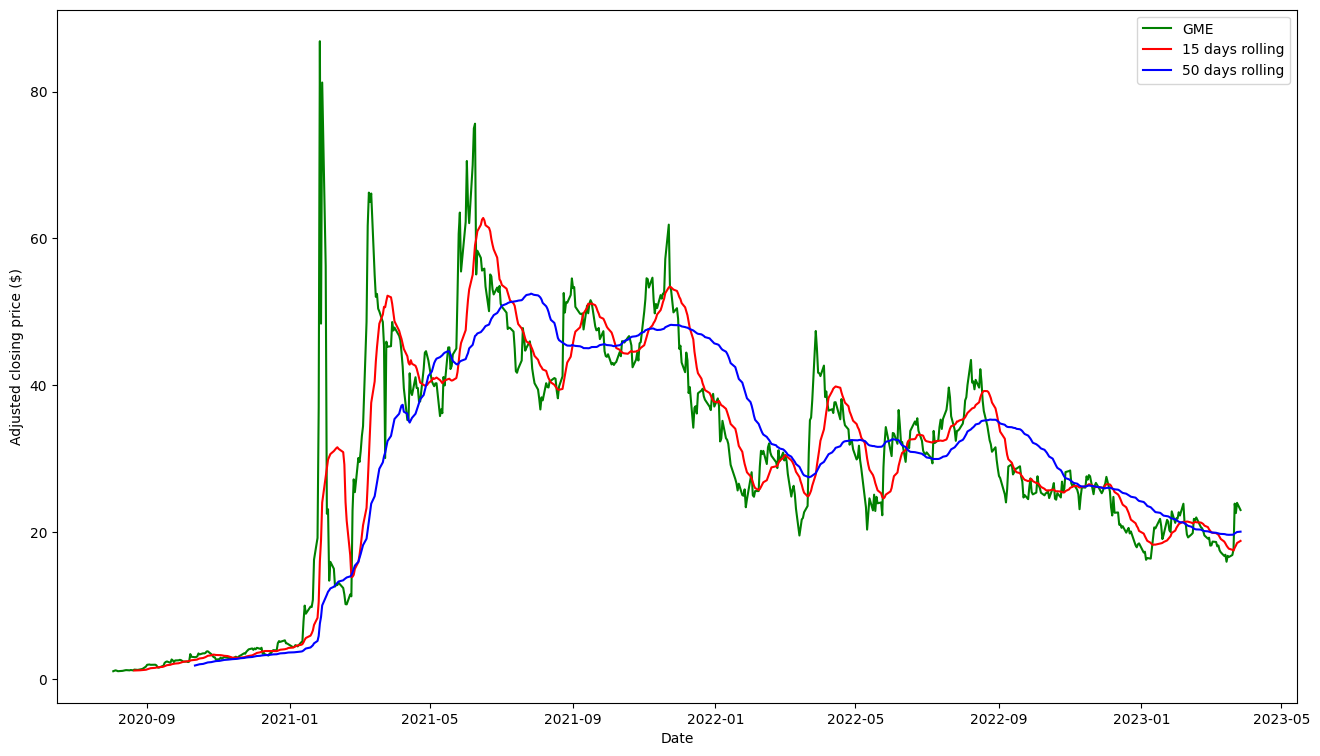

In [5]:
#COMPARING MOVING AVERAGES
df_gme_subset = df_gme["Close"]['2020-8':]
short_rolling_gme = df_gme_subset.rolling(window=15).mean()
long_rolling_gme = df_gme_subset.rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot( df_gme_subset, label='GME',color = "green")
ax.plot(short_rolling_gme, label='15 days rolling', color = "red")
ax.plot(long_rolling_gme, label='50 days rolling', color = "blue")

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

In [6]:

try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url, cafile=certifi.where())
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/key-metrics/GME?apikey=731a4c8b60b5d3cc7ff6696c9a303e42")



#print(get_jsonparsed_data(url))


In [65]:
df_fundamentals = {'date':[],
               'roe':[],
               'peRatio':[],
               'debtToEquity':[],
               'inventoryTurnover':[],
               }

for file in get_jsonparsed_data(url):

  date = file["date"]
  df_fundamentals['date'].append(date)

  roe = file["roe"]
  df_fundamentals['roe'].append(roe)

  peRatio = file["peRatio"]
  df_fundamentals['peRatio'].append(peRatio)

  debtToEquity = file["debtToEquity"]
  df_fundamentals['debtToEquity'].append(debtToEquity)

  inventoryTurnover = file["inventoryTurnover"]
  df_fundamentals['inventoryTurnover'].append(inventoryTurnover)

  



df_fundamentals = pd.DataFrame(df_fundamentals)
df_fundamentals = df_fundamentals[1:11]
df_fundamentals = df_fundamentals.loc[::-1].reset_index(drop=True)
df_fundamentals

<ipython-input-6-2aceaf3b755d>:23: DeprecationWarning: cafile, capath and cadefault are deprecated, use a custom context instead.
  response = urlopen(url, cafile=certifi.where())


,date,roe,peRatio,debtToEquity,inventoryTurnover
0,2013-02-02,-0.117964,-11.571435,0.807987,5.323316
1,2014-02-01,0.157324,11.604190,0.817269,5.320210
2,2015-01-31,0.190115,10.061180,1.053634,5.695405
3,2016-01-30,0.193561,6.897368,1.083085,5.542132
4,2017-01-28,0.156692,7.116801,1.207489,4.992064
5,2018-02-03,0.015669,47.427147,1.276631,4.525134
6,2019-02-02,-0.503667,-1.705207,2.026718,4.779848
7,2020-02-01,-0.770074,-0.713527,3.611120,5.301035
8,2021-01-30,-0.493016,-98.118904,4.662011,6.357344
9,2022-01-29,-0.237941,-18.642187,1.183651,5.096066


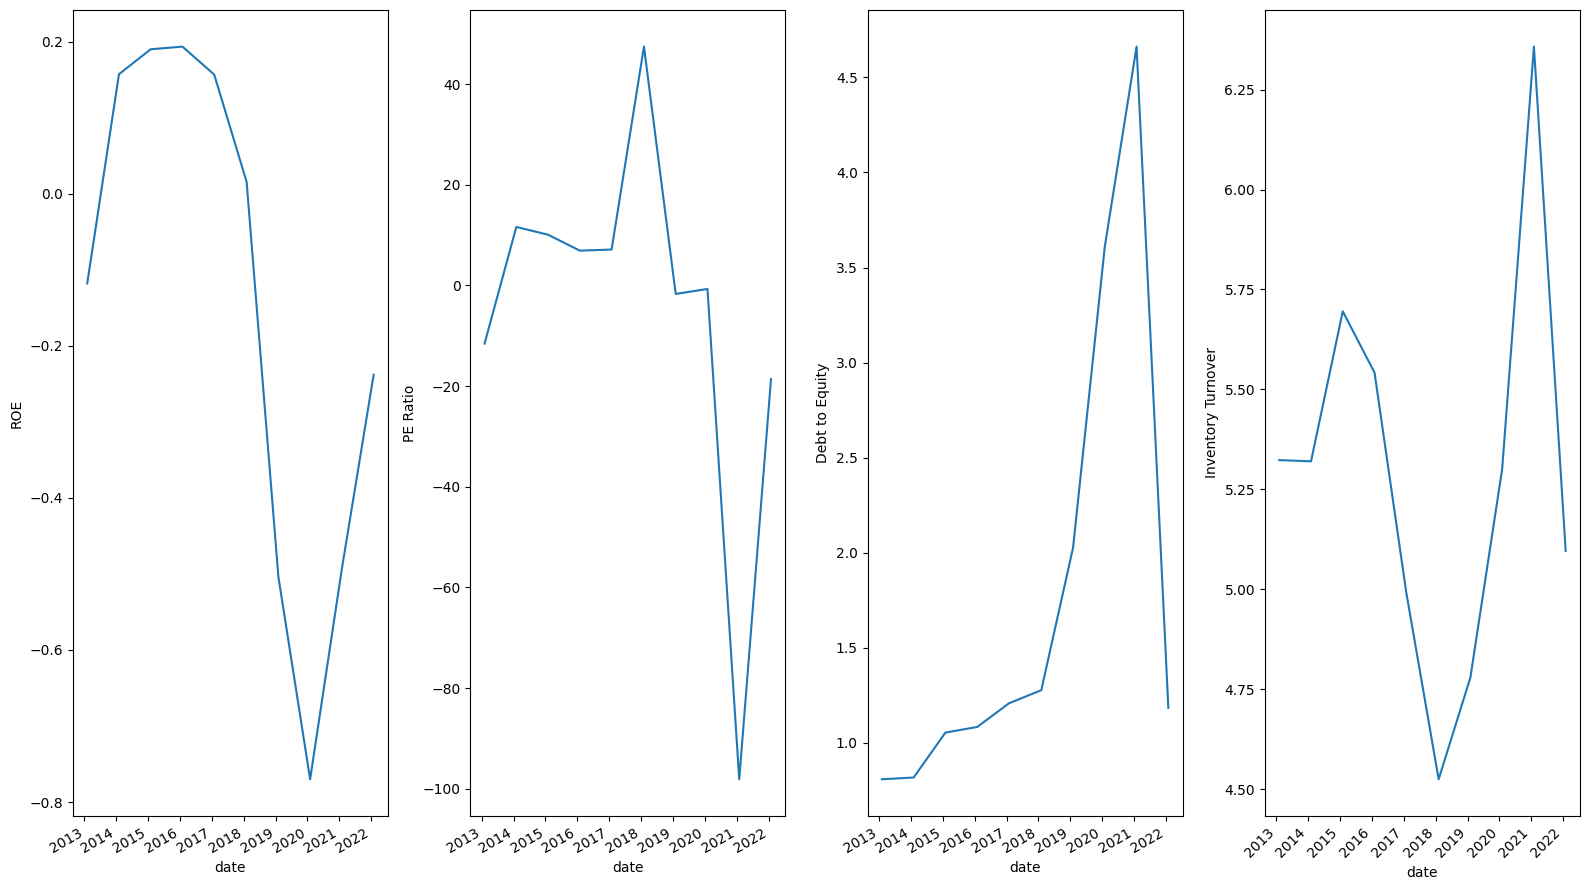

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Set date as the index
df_fundamentals['date'] = pd.to_datetime(df_fundamentals['date'])
df_fundamentals.set_index('date', inplace=True)

# Plot each column as a separate subplot
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,9))

df_fundamentals['roe'].plot(ax=axes[0], legend=False)
axes[0].set_ylabel('ROE')

df_fundamentals['peRatio'].plot(ax=axes[1], legend=False)
axes[1].set_ylabel('PE Ratio')

df_fundamentals['debtToEquity'].plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Debt to Equity')

df_fundamentals['inventoryTurnover'].plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Inventory Turnover')


date_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2021-1'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2021-1":].plot(figsize=(16,4), legend=True)

x = ["2013-02-02","2014-02-01","2015-01-31","2016-01-30","2017-01-28","2018-02-03","2019-02-02","2020-02-01","2021-01-30","	2022-01-29"]
y =  list(df_fundamentals['roe'])


plt.scatter(x,y)
plt.title("GameStop Historical Price Graph(Last 10 Years)")
plt.show()

In [103]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/MGT5399/reddit_wsb.csv')

# Print the first 5 rows of the DataFrame
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
53182,What I Learned Investigating SAVA FUD Spreaders,238,owd2pn,https://www.reddit.com/r/wallstreetbets/commen...,87,1.627906e+09,***TLDR: Three bitter scientists partnered up ...,2021-08-02 15:03:27
53183,"Daily Popular Tickers Thread for August 02, 20...",228,owd1a5,https://www.reddit.com/r/wallstreetbets/commen...,1070,1.627906e+09,\nYour daily hype thread. Please keep the shit...,2021-08-02 15:01:03
53184,Hitler reacts to the market being irrational,7398,owc5dr,https://v.redd.it/46jxu074exe71,372,1.627902e+09,NaN,2021-08-02 13:59:35
53185,"Daily Discussion Thread for August 02, 2021",338,owbfjf,https://www.reddit.com/r/wallstreetbets/commen...,11688,1.627898e+09,Your daily trading discussion thread. Please k...,2021-08-02 13:00:16


In [104]:
df = df.dropna(subset=['title', 'body'])
df = df[(df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False)) | 
        (df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# sort the DataFrame by the "date" column in ascending order
df = df.sort_values('date', ascending=True)
df

<ipython-input-104-28bc9110ab21>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[(df['title'].str.contains(r'\b(Gamestop|GME)\b', case=False)) |
<ipython-input-104-28bc9110ab21>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df['body'].str.contains(r'\b(Gamestop|GME)\b', case=False))]
<ipython-input-104-28bc9110ab21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['timestamp']).dt.date


,title,score,id,url,comms_num,created,body,timestamp,date
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,2021-01-28
781,"What do I do, I have a Td account and need help.",3,l6wxjo,https://www.reddit.com/r/wallstreetbets/commen...,8,1.611870e+09,\nI have an TD Ameritrade account and I just h...,2021-01-28 23:44:44,2021-01-28
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,29,l6wxqy,https://www.reddit.com/r/wallstreetbets/commen...,15,1.611870e+09,Them doing this means we are winning. They are...,2021-01-28 23:45:00,2021-01-28
773,Gamestonks fallout?,0,l6wxui,https://www.reddit.com/r/wallstreetbets/commen...,0,1.611870e+09,Hey I am very new to this sub but I can tell I...,2021-01-28 23:45:08,2021-01-28
767,Yo they closed down GME stocks on robinhood :(,3,l6wxvr,https://www.reddit.com/r/wallstreetbets/commen...,1,1.611870e+09,i can't buy more :((,2021-01-28 23:45:10,2021-01-28
...,...,...,...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,0,p2ltzn,https://www.reddit.com/r/wallstreetbets/commen...,25,1.628715e+09,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11 23:50:57,2021-08-11
52491,CLOV🍀 you Irish fucks,753,p32sdk,https://www.reddit.com/r/wallstreetbets/commen...,134,1.628784e+09,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12 19:00:13,2021-08-12
52433,My loss porn this year (-$35k) with current aw...,84,p3mni4,https://www.reddit.com/r/wallstreetbets/commen...,49,1.628867e+09,I'm down almost $20k worth of deposits and -$3...,2021-08-13 18:08:37,2021-08-13
52408,Follow The Money II - Understanding Sectors An...,224,p3sv17,https://www.reddit.com/r/wallstreetbets/commen...,61,1.628885e+09,# I. Introduction\n\nI think the **hardest par...,2021-08-13 23:00:11,2021-08-13


In [105]:
df = df.drop(columns=['url', 'created', 'id', 'score', 'comms_num', 'timestamp'])
df

,title,body,date
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28
781,"What do I do, I have a Td account and need help.",\nI have an TD Ameritrade account and I just h...,2021-01-28
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,Them doing this means we are winning. They are...,2021-01-28
773,Gamestonks fallout?,Hey I am very new to this sub but I can tell I...,2021-01-28
767,Yo they closed down GME stocks on robinhood :(,i can't buy more :((,2021-01-28
...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13
52408,Follow The Money II - Understanding Sectors An...,# I. Introduction\n\nI think the **hardest par...,2021-08-13


In [114]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
# Words to not include in Word Clouds
my_stopwords = set(STOPWORDS)
# Additional phrases I don't want picked up in word clouds
my_stopwords.update(['https', 'http', '\n', '\t'])

In [115]:
def text_clean(mess):
    nopunct = [char for char in mess if char not in string.punctuation]
    nopunct = ''.join(nopunct)
    return nopunct

In [116]:
title_text = text_clean(df['title'])

In [117]:
body_text = text_clean(df['body'])

(-0.5, 399.5, 199.5, -0.5)

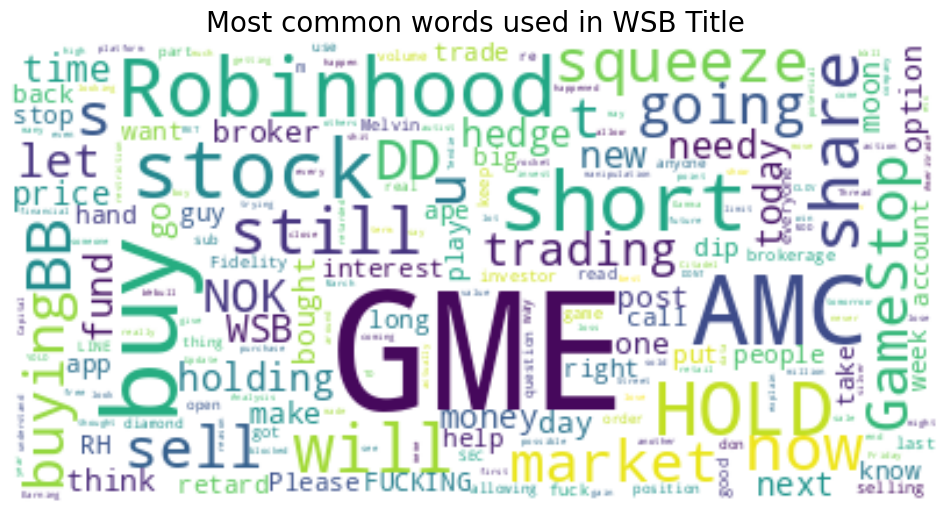

In [118]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(title_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Title', fontsize = 20)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

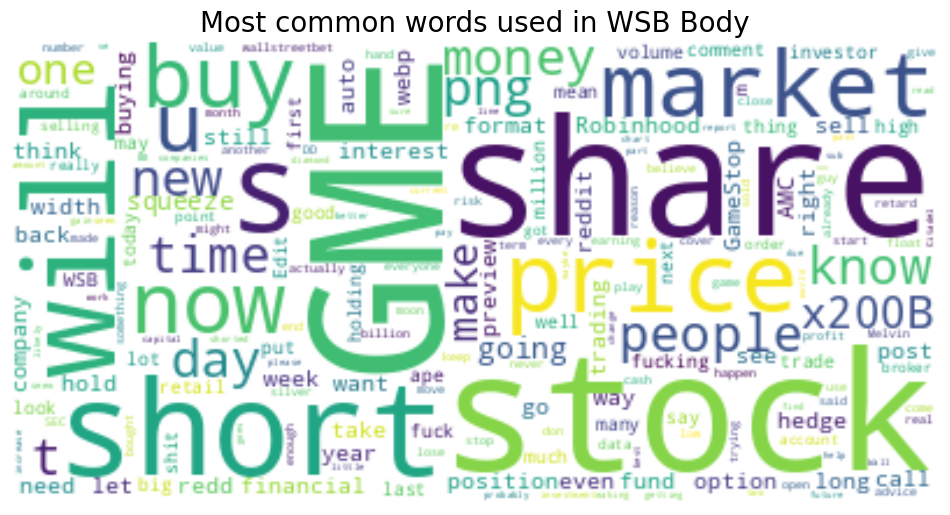

In [119]:
#Creating Title Word Cloud
title_wc = WordCloud(stopwords = my_stopwords, background_color='white', collocations = False).generate(body_text)
plt.figure(figsize=(12,10))
plt.imshow(title_wc, interpolation='bilinear')
plt.title('Most common words used in WSB Body', fontsize = 20)
plt.axis('off')

In [120]:
from textblob import TextBlob

# define a function to calculate the sentiment polarity score of a text
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# calculate the sentiment polarity score for each row and take the mean of the "title" and "body" scores
df['sentiment'] = (df['title'].apply(get_sentiment_score) + df['body'].apply(get_sentiment_score)) / 2


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9812 entries, 2 to 52372
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          9812 non-null   object        
 1   body           9812 non-null   object        
 2   date           9812 non-null   datetime64[ns]
 3   sentiment      9812 non-null   float64       
 4   num_posts      9812 non-null   int64         
 5   sentiment_avg  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 536.6+ KB


In [138]:
df['num_posts'] = df.groupby('date')['title'].transform('count')
df['date'] = pd.to_datetime(df['date'])
df['sentiment_avg'] = df.groupby(df['date'].dt.date)['sentiment'].transform('mean')
df

,title,body,date,sentiment,num_posts,sentiment_avg
2,Exit the system,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28,0.009968,321,0.032261
781,"What do I do, I have a Td account and need help.",\nI have an TD Ameritrade account and I just h...,2021-01-28,0.000000,321,0.032261
776,ROBINHOOD NO LONGER ALLOWS BUYING OF GME AND A...,Them doing this means we are winning. They are...,2021-01-28,-0.112037,321,0.032261
773,Gamestonks fallout?,Hey I am very new to this sub but I can tell I...,2021-01-28,0.062928,321,0.032261
767,Yo they closed down GME stocks on robinhood :(,i can't buy more :((,2021-01-28,-0.230093,321,0.032261
...,...,...,...,...,...,...
52544,GROW: the same guy who discovered GME in June ...,**Facts:**\n\n* Josh Klein is a deep-value in...,2021-08-11,0.055833,2,0.070949
52491,CLOV🍀 you Irish fucks,"“August 12, 2021 10:57 AM ET (BZ Newswire) -- ...",2021-08-12,0.000425,1,0.000425
52433,My loss porn this year (-$35k) with current aw...,I'm down almost $20k worth of deposits and -$3...,2021-08-13,-0.189198,2,-0.070077
52408,Follow The Money II - Understanding Sectors An...,# I. Introduction\n\nI think the **hardest par...,2021-08-13,0.049044,2,-0.070077


In [139]:
df_gme['date'] = df_gme.index.date
df_gme['date'] = pd.to_datetime(df_gme['date'])
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,4.459723,5.063773,4.459723,4.940137,39372800,0.0,0.0,2013-03-28
2013-04-01 00:00:00-04:00,4.945435,5.311044,4.933071,5.256291,28086000,0.0,0.0,2013-04-01
2013-04-02 00:00:00-04:00,5.252758,5.358732,5.132655,5.341070,16349200,0.0,0.0,2013-04-02
2013-04-03 00:00:00-04:00,5.346368,5.406420,5.298680,5.342835,18020400,0.0,0.0,2013-04-03
2013-04-04 00:00:00-04:00,5.335772,5.492966,5.208604,5.279253,17995200,0.0,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,17.150000,18.350000,17.139999,17.650000,15882900,0.0,0.0,2023-03-21
2023-03-22 00:00:00-04:00,26.600000,27.000000,23.049999,23.870001,66764700,0.0,0.0,2023-03-22
2023-03-23 00:00:00-04:00,22.570000,24.590000,22.129999,22.580000,11168900,0.0,0.0,2023-03-23
